In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import datetime
import numpy as np
import missingno as msno
from collections import Counter
from numpy import nansum
from numpy import nanmean

In [2]:
daily_Data_df = pd.read_csv("data_as_csv.csv")
DeadSea_levels_df = pd.read_csv("DeadSea_levels_Scrapping.csv")

In [3]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478100 entries, 0 to 1478099
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1478100 non-null  int64  
 1   _id                1478100 non-null  int64  
 2   stn_num            1478100 non-null  int64  
 3   time_obs           1478100 non-null  object 
 4   tmp_air_max        1262605 non-null  float64
 5   tmp_air_min        1258740 non-null  float64
 6   tmp_grass_min      550331 non-null   float64
 7   evp_cls_a_12       27584 non-null    float64
 8   evp_cls_a_18       51121 non-null    float64
 9   evp_cls_a_06_next  456476 non-null   float64
 10  evp_cls_a_code     490576 non-null   float64
 11  sns_drt            113999 non-null   float64
 12  rpr_hail           272139 non-null   float64
 13  rpr_snow           326881 non-null   float64
 14  rpr_frost          279262 non-null   float64
 15  rpr_dew            110625 non-nu

<AxesSubplot:>

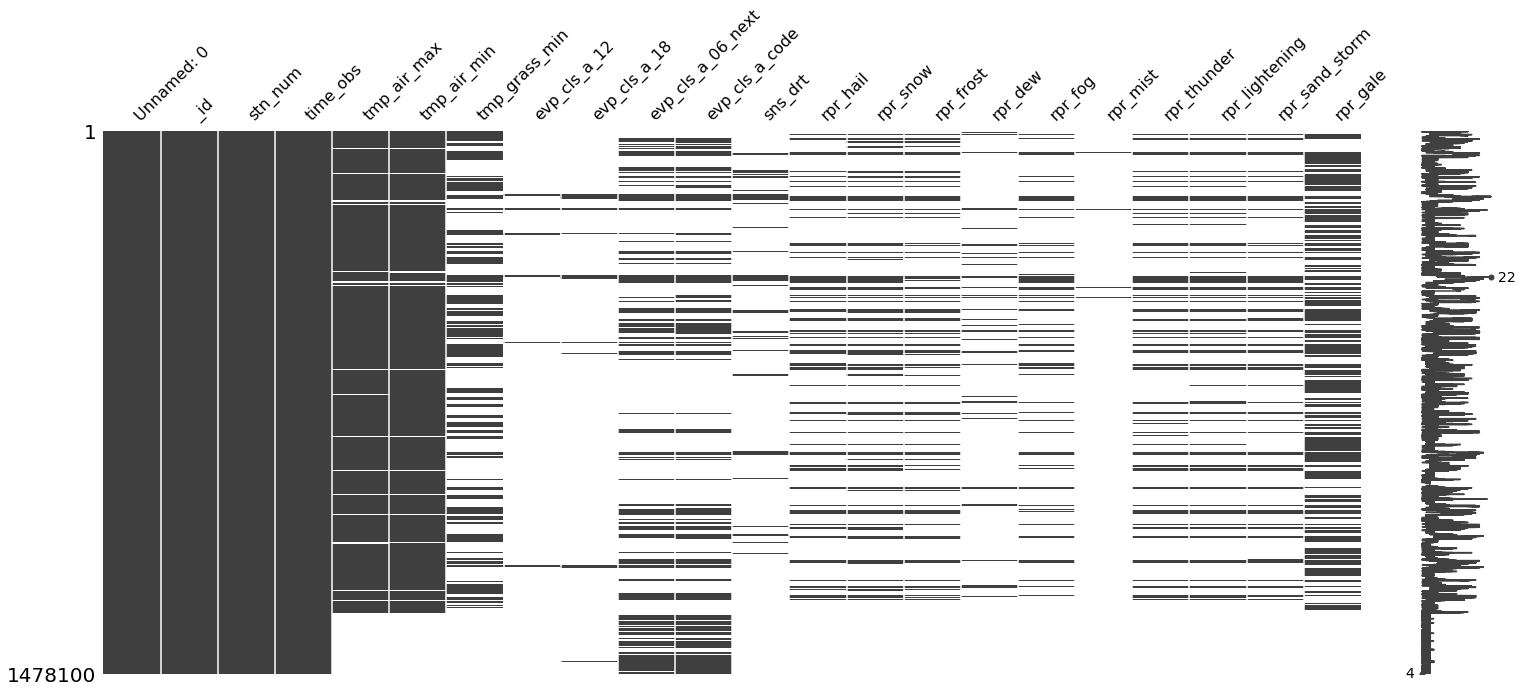

In [4]:
msno.matrix(daily_Data_df)

In [5]:
daily_Data_df= daily_Data_df.drop(['_id','rpr_mist','rpr_dew','evp_cls_a_code','rpr_lightening','rpr_sand_storm','evp_cls_a_06_next','rpr_frost','rpr_thunder','evp_cls_a_18','evp_cls_a_12','tmp_grass_min'],axis=1)

<AxesSubplot:>

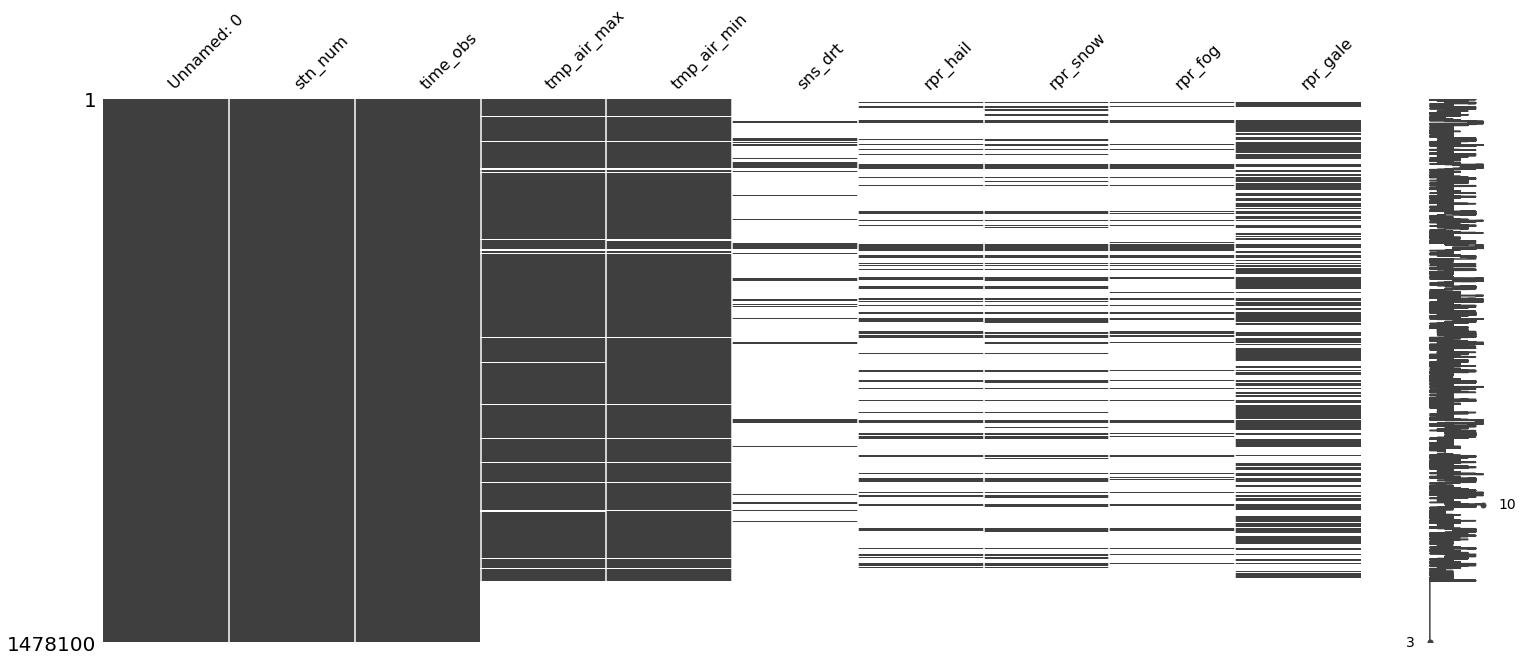

In [6]:
msno.matrix(daily_Data_df)

In [7]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478100 entries, 0 to 1478099
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1478100 non-null  int64  
 1   stn_num      1478100 non-null  int64  
 2   time_obs     1478100 non-null  object 
 3   tmp_air_max  1262605 non-null  float64
 4   tmp_air_min  1258740 non-null  float64
 5   sns_drt      113999 non-null   float64
 6   rpr_hail     272139 non-null   float64
 7   rpr_snow     326881 non-null   float64
 8   rpr_fog      193072 non-null   float64
 9   rpr_gale     756915 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 112.8+ MB


In [8]:
DeadSea_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Test_Date      632 non-null    object 
 1   DeadSea_Level  632 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.0+ KB


In [9]:
DeadSea_levels_df

,Test_Date,DeadSea_Level
0,1976-01-10,-398.95
1,1976-01-11,-399.01
2,1976-01-12,-399.12
3,1977-01-01,-399.05
4,1977-01-02,-399.04
...,...,...
627,2021-03-10,-436.16
628,2021-04-29,-435.44
629,2021-05-31,-435.55
630,2021-08-29,-436.00


In [14]:
daily_Data_df = daily_Data_df.rename({'time_obs': 'Date'}, axis='columns')
daily_Data_df['Date'] = pd.to_datetime(daily_Data_df['Date'])
daily_Data_df

,Unnamed: 0,stn_num,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_fog,rpr_gale
0,0,9029,1978-04-01,232.0,97.0,NaN,NaN,NaN,NaN,NaN
1,1,9029,1978-04-02,260.0,92.0,NaN,NaN,NaN,NaN,NaN
2,2,9029,1978-04-03,242.0,138.0,NaN,NaN,NaN,NaN,NaN
3,3,9029,1978-04-04,306.0,100.0,NaN,NaN,NaN,NaN,NaN
4,4,9029,1978-04-05,245.0,160.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1478095,1478095,9712,2013-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478096,1478096,9712,2013-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478097,1478097,9712,2013-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478098,1478098,9712,2013-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
DeadSea_levels_df = DeadSea_levels_df.rename({'Test_Date': 'Date'}, axis='columns')
DeadSea_levels_df['Date'] = pd.to_datetime(DeadSea_levels_df['Date'])
DeadSea_levels_df = DeadSea_levels_df.sort_values(by=['Date'])
DeadSea_levels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           632 non-null    datetime64[ns]
 1   DeadSea_Level  632 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.8 KB


In [16]:
daily_Data_df = pd.merge(daily_Data_df, DeadSea_levels_df, how='right')
daily_Data_df['tmp_air_max'] = daily_Data_df['tmp_air_max']/10
daily_Data_df['tmp_air_min'] = daily_Data_df['tmp_air_min']/10

    

daily_Data_df = daily_Data_df.groupby('Date').agg({'tmp_air_max':'mean','tmp_air_min':'mean','sns_drt':'mean','rpr_hail':'mean',
                                     'rpr_snow':'mean','rpr_gale':'mean'}).reset_index()                
daily_Data_df = daily_Data_df.sort_values(by=['Date'])
daily_Data_df = daily_Data_df[daily_Data_df['Date'].dt.year >= 1976]
daily_Data_df

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_gale
0,1976-01-10,16.738000,6.052000,528.000000,0.000000,0.0,0.0
1,1976-01-11,14.580000,5.986000,324.000000,0.000000,0.0,0.0
2,1976-01-12,15.430000,8.210000,304.800000,0.068966,0.0,0.0
3,1977-01-01,16.755102,9.412245,138.000000,0.000000,0.0,0.0
4,1977-01-02,16.827660,8.524490,352.285714,0.062500,0.0,0.0
...,...,...,...,...,...,...,...
627,2021-03-10,29.571951,14.760241,492.857143,0.000000,0.0,0.0
628,2021-04-29,32.465060,15.849398,721.666667,0.000000,0.0,0.0
629,2021-05-31,38.124096,19.459036,710.000000,0.000000,0.0,0.0
630,2021-08-29,34.243373,23.516867,662.000000,0.000000,0.0,0.0


In [17]:
daily_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         632 non-null    datetime64[ns]
 1   tmp_air_max  631 non-null    float64       
 2   tmp_air_min  631 non-null    float64       
 3   sns_drt      617 non-null    float64       
 4   rpr_hail     631 non-null    float64       
 5   rpr_snow     631 non-null    float64       
 6   rpr_gale     631 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 39.5 KB


<AxesSubplot:>

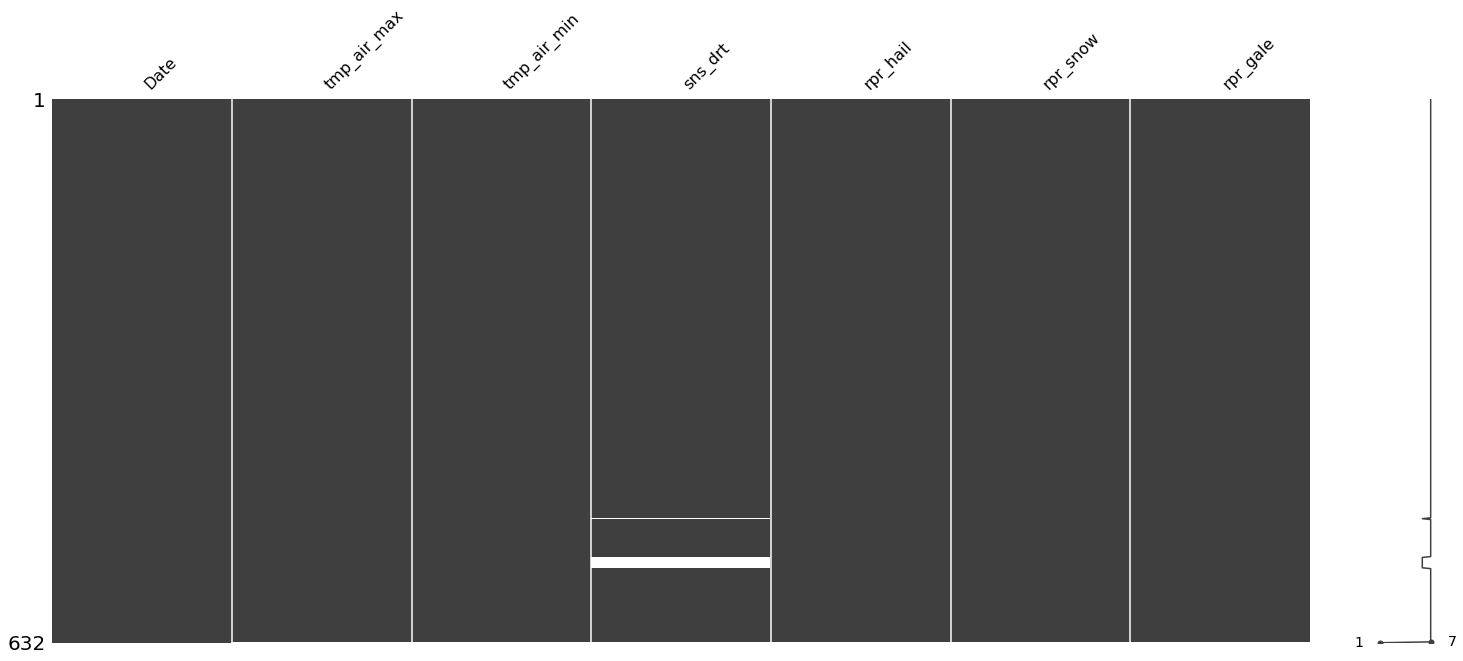

In [18]:
msno.matrix(daily_Data_df)

In [19]:
DeadSea_levels_df.head()

,Date,DeadSea_Level
0,1976-01-10,-398.95
1,1976-01-11,-399.01
2,1976-01-12,-399.12
3,1977-01-01,-399.05
4,1977-01-02,-399.04


In [20]:
all_Dataset = daily_Data_df.copy()
all_Dataset = pd.merge(all_Dataset, DeadSea_levels_df, how='left', on='Date')
all_Dataset['Date'] =pd.to_datetime(all_Dataset['Date'])

# הוספת עמודות לטובת המשך טיפול שנראה בעתיד 
all_Dataset['Year'] = pd.DatetimeIndex(all_Dataset['Date']).year
all_Dataset['Month'] = pd.DatetimeIndex(all_Dataset['Date']).month
all_Dataset['Day'] = pd.DatetimeIndex(all_Dataset['Date']).day
all_Dataset = all_Dataset.sort_values(by=['Date'])
all_Dataset

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_gale,DeadSea_Level,Year,Month,Day
0,1976-01-10,16.738000,6.052000,528.000000,0.000000,0.0,0.0,-398.95,1976,1,10
1,1976-01-11,14.580000,5.986000,324.000000,0.000000,0.0,0.0,-399.01,1976,1,11
2,1976-01-12,15.430000,8.210000,304.800000,0.068966,0.0,0.0,-399.12,1976,1,12
3,1977-01-01,16.755102,9.412245,138.000000,0.000000,0.0,0.0,-399.05,1977,1,1
4,1977-01-02,16.827660,8.524490,352.285714,0.062500,0.0,0.0,-399.04,1977,1,2
...,...,...,...,...,...,...,...,...,...,...,...
627,2021-03-10,29.571951,14.760241,492.857143,0.000000,0.0,0.0,-436.16,2021,3,10
628,2021-04-29,32.465060,15.849398,721.666667,0.000000,0.0,0.0,-435.44,2021,4,29
629,2021-05-31,38.124096,19.459036,710.000000,0.000000,0.0,0.0,-435.55,2021,5,31
630,2021-08-29,34.243373,23.516867,662.000000,0.000000,0.0,0.0,-436.00,2021,8,29


In [21]:
all_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 631
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           632 non-null    datetime64[ns]
 1   tmp_air_max    631 non-null    float64       
 2   tmp_air_min    631 non-null    float64       
 3   sns_drt        617 non-null    float64       
 4   rpr_hail       631 non-null    float64       
 5   rpr_snow       631 non-null    float64       
 6   rpr_gale       631 non-null    float64       
 7   DeadSea_Level  632 non-null    float64       
 8   Year           632 non-null    int64         
 9   Month          632 non-null    int64         
 10  Day            632 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 59.2 KB


In [23]:
all_Dataset['rpr_hail']=all_Dataset['rpr_hail'].fillna(0)
all_Dataset['rpr_snow']=all_Dataset['rpr_snow'].fillna(0)
all_Dataset['rpr_gale']=all_Dataset['rpr_gale'].fillna(0)


all_Dataset['Change_from_lasTest']=all_Dataset['DeadSea_Level']-all_Dataset['DeadSea_Level'].shift()
all_Dataset['DeadSeaLevelsInPrecent']= (all_Dataset['DeadSea_Level']-all_Dataset['DeadSea_Level'].min())/(all_Dataset['DeadSea_Level'].max()-all_Dataset['DeadSea_Level'].min())
all_Dataset=all_Dataset.dropna(subset=['sns_drt'])
all_Dataset.to_csv('all_DatasetFile.csv', index=False)

<AxesSubplot:>

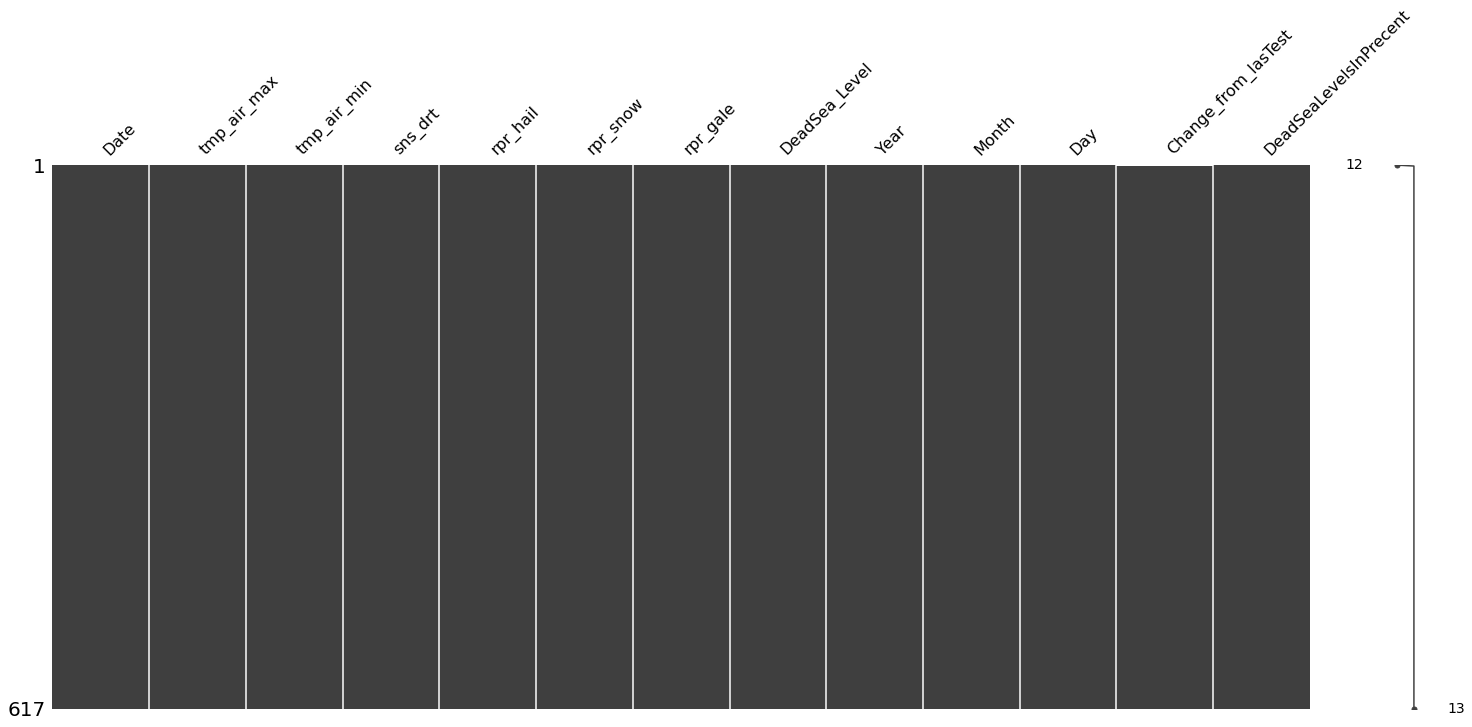

In [24]:
msno.matrix(all_Dataset)

In [26]:
all_Dataset

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_gale,DeadSea_Level,Year,Month,Day,Change_from_lasTest,DeadSeaLevelsInPrecent
0,1976-01-10,16.738000,6.052000,528.000000,0.000000,0.0,0.0,-398.95,1976,1,10,NaN,1.000000
1,1976-01-11,14.580000,5.986000,324.000000,0.000000,0.0,0.0,-399.01,1976,1,11,-0.06,0.998397
2,1976-01-12,15.430000,8.210000,304.800000,0.068966,0.0,0.0,-399.12,1976,1,12,-0.11,0.995459
3,1977-01-01,16.755102,9.412245,138.000000,0.000000,0.0,0.0,-399.05,1977,1,1,0.07,0.997329
4,1977-01-02,16.827660,8.524490,352.285714,0.062500,0.0,0.0,-399.04,1977,1,2,0.01,0.997596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2021-02-26,21.182927,8.424390,631.428571,0.000000,0.0,0.0,-435.28,2021,2,26,0.03,0.029647
627,2021-03-10,29.571951,14.760241,492.857143,0.000000,0.0,0.0,-436.16,2021,3,10,-0.88,0.006143
628,2021-04-29,32.465060,15.849398,721.666667,0.000000,0.0,0.0,-435.44,2021,4,29,0.72,0.025374
629,2021-05-31,38.124096,19.459036,710.000000,0.000000,0.0,0.0,-435.55,2021,5,31,-0.11,0.022436


In [30]:
# טיפול בחריגים

def detect_outliers(Data, num, prop):
    all_outliers_rows = []
    for col in prop:
        Q1 = np.percentile(Data[col], 25)
        Q3 = np.percentile(Data[col], 75)
        IQR = Q3 - Q1
        IQR_Range = 1.5 * IQR
        col_outlier = Data[(Data[col] < Q1 - IQR_Range) | (Data[col] > Q3 + IQR_Range)].index
        all_outliers_rows.extend(col_outlier)

    all_outliers_rows = Counter(all_outliers_rows)        
    multi_outliers = list(k for k, v in all_outliers_rows.items() if v > num )
    return multi_outliers   

Outliers_to_drop = detect_outliers(all_Dataset, 3, all_Dataset.columns[6:len(all_Dataset.columns)-1])
print(len(Outliers_to_drop))

0


In [32]:
all_DataByYear= all_Dataset.copy()
# החלפת שמות
all_DataByYear=all_DataByYear.rename({'DeadSea_Level': 'DeadSea_Level_End_Of_Year', 'DeadSeaLevelsInPrecent': 'DeadSeaInPrecent_End_Of_Year'}, axis=1)
all_DataByYear=all_DataByYear.groupby('Year').agg({'DeadSea_Level_End_Of_Year':'last',
                                     # מפלס של בדיקה אחרונה בשנה
                                    'DeadSeaInPrecent_End_Of_Year':'last', 'sns_drt':'mean','rpr_hail':'mean','rpr_snow':'mean',
                                    'rpr_gale':'mean','tmp_air_max':'mean','tmp_air_min':'mean'}).reset_index()

# חישוב השינוי מהשנה האחרונה
all_DataByYear['Change_From_Last_Year']=all_DataByYear['DeadSea_Level_End_Of_Year']-all_DataByYear['DeadSea_Level_End_Of_Year'].shift()
all_DataByYear.to_csv('all_DatasetFileByYear.csv', index=False)
all_DataByYear

,Year,DeadSea_Level_End_Of_Year,DeadSeaInPrecent_End_Of_Year,sns_drt,rpr_hail,rpr_snow,rpr_gale,tmp_air_max,tmp_air_min,Change_From_Last_Year
0,1976,-399.120,0.995459,385.600000,0.022989,0.000000,0.000000,15.582667,6.749333,NaN
1,1977,-399.880,0.975160,290.880952,0.048621,0.036794,0.002688,13.589353,6.001287,-0.760
2,1978,-400.380,0.961806,388.133333,0.037124,0.008082,0.035227,14.250987,5.902926,-0.500
3,1979,-400.140,0.968216,347.298611,0.010017,0.007985,0.029417,16.301803,7.491706,0.240
4,1980,-400.490,0.958868,361.145833,0.048957,0.023420,0.014184,15.008007,6.466869,-0.350
5,1981,-400.630,0.955128,341.571429,0.032932,0.016776,0.028456,14.518209,6.613935,-0.140
6,1982,-401.390,0.934829,371.330357,0.009259,0.000000,0.001984,17.195195,8.315814,-0.760
7,1983,-402.040,0.917468,263.463889,0.042929,0.049216,0.029485,12.390532,5.061111,-0.650
8,1984,-403.080,0.889690,376.500000,0.010417,0.000000,0.000000,17.189827,8.090456,-1.040
9,1985,-403.660,0.874199,380.916667,0.006667,0.000000,0.000000,18.510141,7.591060,-0.580


In [33]:
all_DataByMonth = all_Dataset.copy()
all_DataByMonth = all_DataByMonth.rename({'DeadSea_Level': 'DeadSea_Level_End_Of_Month'}, axis=1)
all_DataByMonth=all_DataByMonth.groupby(['Year','Month']).agg({'DeadSea_Level_End_Of_Month':'last',
                    'tmp_air_max':'mean', 'tmp_air_min':'mean','sns_drt':'mean'}).reset_index()
                                               
all_DataByMonth['Date'] = all_DataByMonth["Year"].astype(str)+'-'+all_DataByMonth["Month"].astype(str)
all_DataByMonth['Date'] = pd.to_datetime(all_DataByMonth['Date'])


# שינוי המפלס
all_DataByMonth['Change_From_Last_Month']=all_DataByMonth['DeadSea_Level_End_Of_Month']-all_DataByMonth['DeadSea_Level_End_Of_Month'].shift()
all_DataByMonth.to_csv('all_DatasetFileByMonth.csv', index=False)
all_DataByMonth

,Year,Month,DeadSea_Level_End_Of_Month,tmp_air_max,tmp_air_min,sns_drt,Date,Change_From_Last_Month
0,1976,1,-399.12,15.582667,6.749333,385.600000,1976-01-01,NaN
1,1977,1,-399.88,13.589353,6.001287,290.880952,1977-01-01,-0.76
2,1978,1,-400.38,14.250987,5.902926,388.133333,1978-01-01,-0.50
3,1979,1,-400.14,16.301803,7.491706,347.298611,1979-01-01,0.24
4,1980,1,-400.49,15.008007,6.466869,361.145833,1980-01-01,-0.35
...,...,...,...,...,...,...,...,...
314,2021,2,-435.28,21.182927,8.424390,631.428571,2021-02-01,0.03
315,2021,3,-436.16,29.571951,14.760241,492.857143,2021-03-01,-0.88
316,2021,4,-435.44,32.465060,15.849398,721.666667,2021-04-01,0.72
317,2021,5,-435.55,38.124096,19.459036,710.000000,2021-05-01,-0.11


In [34]:
all_DataByMonth.tail()

,Year,Month,DeadSea_Level_End_Of_Month,tmp_air_max,tmp_air_min,sns_drt,Date,Change_From_Last_Month
314,2021,2,-435.28,21.182927,8.424390,631.428571,2021-02-01,0.03
315,2021,3,-436.16,29.571951,14.760241,492.857143,2021-03-01,-0.88
316,2021,4,-435.44,32.465060,15.849398,721.666667,2021-04-01,0.72
317,2021,5,-435.55,38.124096,19.459036,710.000000,2021-05-01,-0.11
318,2021,8,-436.00,34.243373,23.516867,662.000000,2021-08-01,-0.45


In [35]:
all_DataByMonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Year                        319 non-null    int64         
 1   Month                       319 non-null    int64         
 2   DeadSea_Level_End_Of_Month  319 non-null    float64       
 3   tmp_air_max                 319 non-null    float64       
 4   tmp_air_min                 319 non-null    float64       
 5   sns_drt                     319 non-null    float64       
 6   Date                        319 non-null    datetime64[ns]
 7   Change_From_Last_Month      318 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 20.1 KB


In [36]:
all_DataByMonth=all_DataByMonth.dropna(subset=['Change_From_Last_Month'])
all_DataByMonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 1 to 318
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Year                        318 non-null    int64         
 1   Month                       318 non-null    int64         
 2   DeadSea_Level_End_Of_Month  318 non-null    float64       
 3   tmp_air_max                 318 non-null    float64       
 4   tmp_air_min                 318 non-null    float64       
 5   sns_drt                     318 non-null    float64       
 6   Date                        318 non-null    datetime64[ns]
 7   Change_From_Last_Month      318 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 22.4 KB


In [37]:
all_DataByMonth.to_csv('all_DatasetFileByMonth.csv', index=False)